In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 18s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

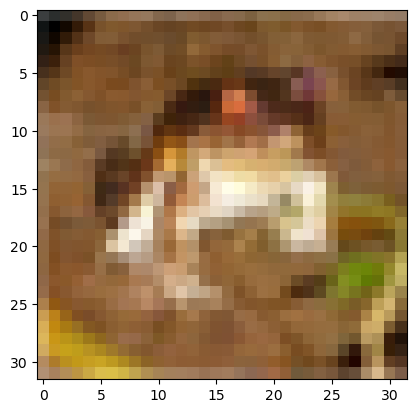

In [6]:
# FROG
plt.imshow(x_train[0])

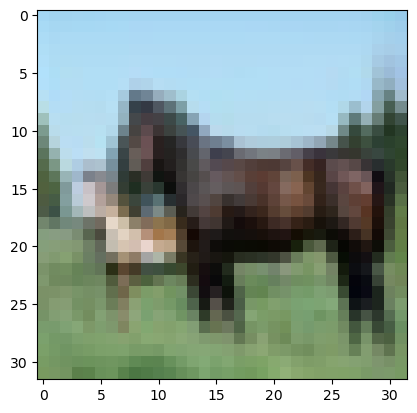

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [27]:
model.fit(x_train,y_cat_train,epochs=30,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/30
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5541 - accuracy: 0.4429 - val_loss: 1.4016 - val_accuracy: 0.4969
Epoch 2/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1891 - accuracy: 0.5805 - val_loss: 1.1710 - val_accuracy: 0.5924
Epoch 3/30
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0329 - accuracy: 0.6423 - val_loss: 1.0248 - val_accuracy: 0.6471
Epoch 4/30
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9202 - accuracy: 0.6833 - val_loss: 1.0597 - val_accuracy: 0.6410
Epoch 5/30
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8412 - accuracy: 0.7110 - val_loss: 1.2251 - val_accuracy: 0.6050
Epoch 6/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7699 - accuracy: 0.7386 - val_loss: 1.0441 - val_accuracy: 0.6661
Epoch 7/30
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7129 - accuracy: 0.7577 - val_loss: 1.0449 -

In [28]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs.h5')

C:\Users\chris\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.554116,0.44292,1.401636,0.4969
1,1.189067,0.58054,1.170986,0.5924
2,1.032943,0.64234,1.024815,0.6471
3,0.920234,0.68326,1.059657,0.6410
4,0.841153,0.71100,1.225064,0.6050


<Axes: >

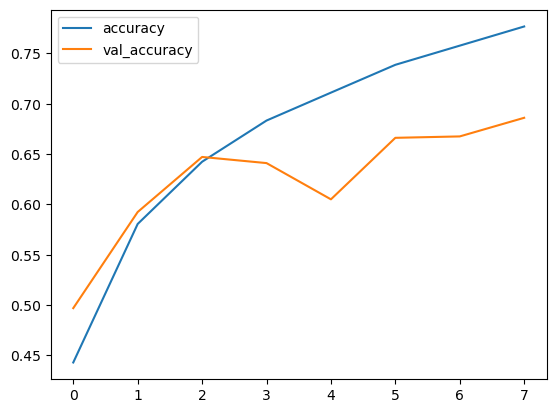

In [31]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

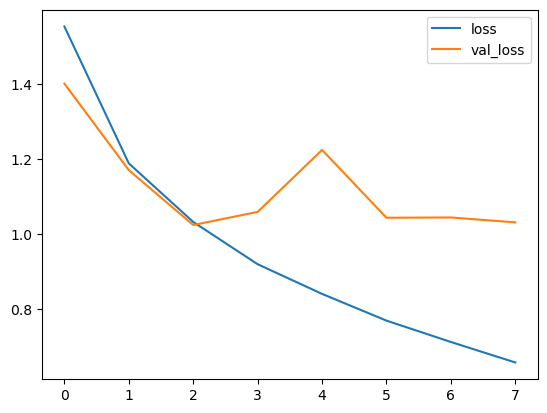

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0318607091903687, 0.6859999895095825]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis=1)

313/313 [==============================] - 2s 5ms/step


In [36]:
print(classification_report(y_test,predictions,digits=4))

              precision    recall  f1-score   support

           0     0.7438    0.7200    0.7317      1000
           1     0.8665    0.7530    0.8058      1000
           2     0.5065    0.6630    0.5743      1000
           3     0.5764    0.4600    0.5117      1000
           4     0.6072    0.6430    0.6246      1000
           5     0.6158    0.5690    0.5915      1000
           6     0.7694    0.7540    0.7616      1000
           7     0.7616    0.7220    0.7413      1000
           8     0.6787    0.8620    0.7595      1000
           9     0.8160    0.7140    0.7616      1000

    accuracy                         0.6860     10000
   macro avg     0.6942    0.6860    0.6863     10000
weighted avg     0.6942    0.6860    0.6863     10000



In [37]:
confusion_matrix(y_test,predictions)

array([[720,  16,  80,  10,  24,   9,   7,  17,  90,  27],
       [ 25, 753,  15,   9,  11,   6,  11,   2,  93,  75],
       [ 48,   5, 663,  37,  80,  60,  55,  26,  18,   8],
       [ 18,   8, 115, 460,  83, 160,  58,  44,  39,  15],
       [ 21,   0, 131,  38, 643,  34,  52,  53,  26,   2],
       [  9,   8, 111, 136,  67, 569,  28,  48,  14,  10],
       [  7,   6,  87,  51,  39,  22, 754,   8,  23,   3],
       [ 15,   2,  57,  30,  97,  49,   6, 722,  14,   8],
       [ 63,  10,  25,  11,   4,   7,   1,   4, 862,  13],
       [ 42,  61,  25,  16,  11,   8,   8,  24,  91, 714]], dtype=int64)

<Axes: >

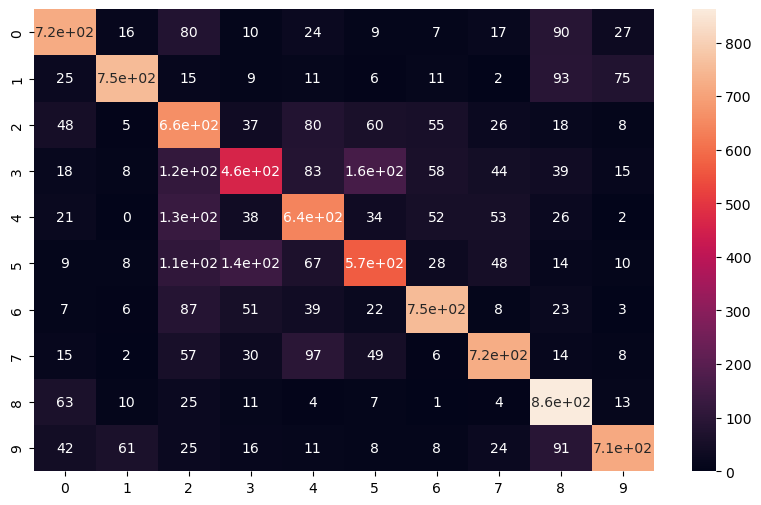

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [39]:
my_image = x_test[16]

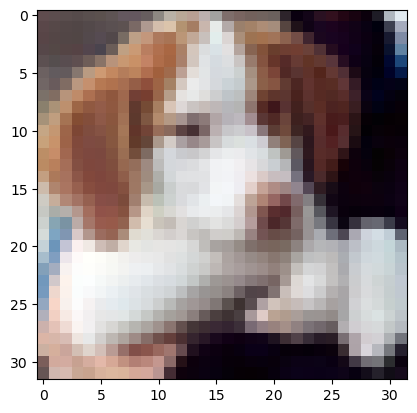

In [40]:
plt.imshow(my_image)

In [41]:
# SHAPE --> (num_images,width,height,color_channels)
pred = model.predict(my_image.reshape(1,32,32,3))
pred = np.argmax(pred,axis=1)
pred

1/1 [==============================] - 0s 36ms/step


array([5], dtype=int64)

In [42]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html